In [5]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns 

In [6]:
# unzip Jarkarta file to appear in MyDrive
! unzip "/content/drive/MyDrive/Colab Notebooks/Grab-Posisi dataset/grab-posis-city=Jakarta.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Grab-Posisi dataset/grab-posis-city=Jakarta.zip
   creating: city=Jakarta/
  inflating: city=Jakarta/part-00003-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet  
  inflating: city=Jakarta/part-00008-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet  
  inflating: city=Jakarta/part-00004-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet  
  inflating: city=Jakarta/part-00005-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet  
  inflating: city=Jakarta/part-00002-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet  
  inflating: city=Jakarta/part-00009-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet  
  inflating: city=Jakarta/part-00007-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet  
  inflating: city=Jakarta/part-00000-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet  
  inflating: city=Jakarta/part-00001-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet  
  inflating:

In [7]:
df_j = pd.read_parquet('city=Jakarta/part-00003-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet' ,  engine = 'pyarrow')
df_j

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy
0,32903,motorcycle,android,1555645295,-6.214046,106.863081,5.310000,114,4.551
1,19636,car,android,1555481128,-6.225396,106.734492,3.290000,173,3.891
2,54661,car,android,1554692413,-6.192424,106.848922,0.000000,243,3.000
3,58169,car,ios,1554889275,-6.288463,106.824965,5.360000,190,10.000
4,79157,car,ios,1554712604,-6.173193,106.876781,13.136877,190,6.000
...,...,...,...,...,...,...,...,...,...
5598073,4724,car,android,1554974349,-6.302968,106.884745,6.335201,132,3.900
5598074,40843,motorcycle,android,1555125611,-6.157164,106.792529,0.720000,253,3.787
5598075,80252,car,android,1555010807,-6.150477,106.888564,24.790000,26,9.000
5598076,70897,car,ios,1554820720,-6.155914,106.851439,3.759183,250,8.000


In [8]:
# functions to change dtypes(CTRL + SHIFT + L to edit all same argument names at once)
df_j['trj_id'] = df_j['trj_id'].astype('category')
df_j['driving_mode'] = df_j['driving_mode'].astype('category')
df_j['osname'] = df_j['osname'].astype('category')
df_j['pingtimestamp'] = df_j['pingtimestamp'].astype('int32')
df_j['rawlat'] = df_j['rawlat'].astype('float32')
df_j['rawlng'] = df_j['rawlng'].astype('float32')
df_j['speed'] = df_j['speed'].astype('float32')
df_j['bearing'] = df_j['bearing'].astype('int32')
df_j['accuracy'] = df_j['accuracy'].astype('float32')


def format_datetime(df, col_name):
    # get datetime obj for all timestamps
    dt = df[col_name].apply(datetime.datetime.fromtimestamp)
    
    df["time"] = dt.apply(lambda x: x.time())
    df["day_of_week"] = dt.apply(lambda x: x.weekday())
format_datetime(df_j, "pingtimestamp")

In [9]:
df_j.describe()

,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,day_of_week
count,5.598078e+06,5.598078e+06,5.598078e+06,5.598078e+06,5.598078e+06,5.598078e+06,5.598078e+06
mean,1.555361e+09,-6.092296e+00,1.035056e+02,7.742538e+00,1.713713e+02,6.368297e+00,3.310318e+00
std,3.634950e+05,1.951934e-01,3.367133e+00,5.151310e+00,1.086076e+02,4.825172e+00,1.961581e+00
min,1.554682e+09,-6.878986e+00,1.058844e+02,-1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,1.555044e+09,-6.296316e+00,1.067699e+02,4.020000e+00,8.300000e+01,3.900000e+00,2.000000e+00
50%,1.555412e+09,-6.235201e+00,1.068222e+02,7.301215e+00,1.740000e+02,5.000000e+00,3.000000e+00
75%,1.555674e+09,-6.186357e+00,1.068780e+02,1.049000e+01,2.680000e+02,8.378000e+00,5.000000e+00
max,1.555891e+09,-5.923933e+00,1.079311e+02,9.263610e+01,3.590000e+02,2.000000e+03,6.000000e+00


In [10]:
# check for any NA values in jarkarta dataset
df_j.isnull().sum()

trj_id           0
driving_mode     0
osname           0
pingtimestamp    0
rawlat           0
rawlng           0
speed            0
bearing          0
accuracy         0
time             0
day_of_week      0
dtype: int64

In [36]:
df_j['bearing'].value_counts()

0      268640
267     28191
87      28104
86      27820
266     27089
        ...  
44       8529
47       8519
45       8514
227      8504
46       8496
Name: bearing, Length: 360, dtype: int64

In [11]:
import folium
from folium import plugins
from branca.element import Figure

# latitude and longitude of Jakarta
indo_lat = -6.200000
indo_lng = 106.816666

In [12]:
# create figure
fig = Figure(width = 550, height = 350)

# add map to figure
m = folium.Map(width = 550, height = 350,
               location = [indo_lat, indo_lng],
               zoom_start = 11, min_zoom = 11, max_zoom = 16)
fig.add_child(m)

In [13]:
# create figure
fig = Figure(width = 550, height = 350)

# add map to figure
m = folium.Map(width = 550, height = 350,
               location = [indo_lat, indo_lng],
               zoom_start = 11, min_zoom = 11, max_zoom = 16,
               tiles = "Stamen Toner")
# can use "Stamen Terrain", "Stamen Toner", "Mapbox Bright", "Mapbox Control Room"
fig.add_child(m)


experiment using Lat and Long Popups for Data Visualisation as well as the accuracy(circle of radius)

In [14]:
df_sample = df_j.sample(100)
df_j.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day_of_week
0,32903,motorcycle,android,1555645295,-6.214046,106.863083,5.310000,114,4.551,03:41:35,4
1,19636,car,android,1555481128,-6.225396,106.734489,3.290000,173,3.891,06:05:28,2
2,54661,car,android,1554692413,-6.192424,106.848923,0.000000,243,3.000,03:00:13,0
3,58169,car,ios,1554889275,-6.288464,106.824966,5.360000,190,10.000,09:41:15,2
4,79157,car,ios,1554712604,-6.173193,106.876778,13.136877,190,6.000,08:36:44,0


In [15]:
fig5 = Figure(width = 550, height = 350)

m5 = folium.Map(width = 550, height = 350,
               location = [indo_lat, indo_lng],
               zoom_start = 11, min_zoom = 11, max_zoom = 16,
               )
for i in range(0,len(df_sample)):
    lat = df_sample.iloc[i].rawlat.astype('float64')
    lon = df_sample.iloc[i].rawlng.astype('float64')
    acc = df_sample.iloc[i].accuracy.astype('float64')
    folium.Circle(radius = acc,location = [lat,lon],color = "#3186cc",fill = True,fill_color = "#3186cc").add_to(m5)

fig5.add_child(m5)

m5

In [18]:
# filtering by the unique rides
df_copy = df_j.copy()
df_copy = df_copy.sort_values("pingtimestamp",ascending = True)
df_unique = df_copy.drop_duplicates(subset=['trj_id'])
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55995 entries, 292607 to 2030236
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   trj_id         55995 non-null  category
 1   driving_mode   55995 non-null  category
 2   osname         55995 non-null  category
 3   pingtimestamp  55995 non-null  int32   
 4   rawlat         55995 non-null  float32 
 5   rawlng         55995 non-null  float32 
 6   speed          55995 non-null  float32 
 7   bearing        55995 non-null  int32   
 8   accuracy       55995 non-null  float32 
 9   time           55995 non-null  object  
 10  day_of_week    55995 non-null  int64   
dtypes: category(3), float32(4), int32(2), int64(1), object(1)
memory usage: 5.3+ MB


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

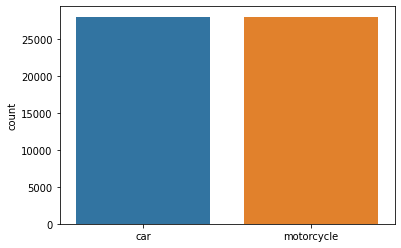

In [21]:
driving_modes = df_j.groupby('trj_id').apply(lambda x: x.iloc[0, 1])
sns.countplot(x = driving_modes)


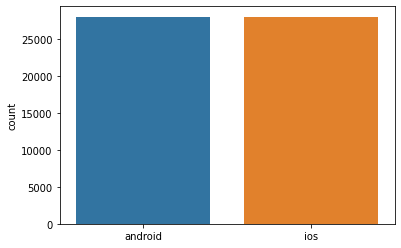

In [25]:
osnames = df_j.groupby('trj_id').apply(lambda x: x.iloc[0, 2])
sns.countplot(x = osnames)

In [39]:
df_unique['trj_id'].describe()

count     55995
unique    55995
top           1
freq          1
Name: trj_id, dtype: object

In [40]:
df_unique['driving_mode'].value_counts

<bound method IndexOpsMixin.value_counts of 292607     motorcycle
1413454    motorcycle
3086001           car
2064907           car
2530902    motorcycle
              ...    
736697     motorcycle
2444365    motorcycle
4368286    motorcycle
397839     motorcycle
2030236    motorcycle
Name: driving_mode, Length: 55995, dtype: category
Categories (2, object): ['car', 'motorcycle']>

In [41]:
df_unique.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day_of_week
292607,27648,motorcycle,android,1554682046,-6.248769,106.878899,3.520000,271,3.964,00:07:26,0
1413454,25922,motorcycle,android,1554682136,-6.579197,106.756119,6.210129,272,3.900,00:08:56,0
3086001,49676,car,ios,1554682205,-6.145008,106.880241,14.640000,214,5.000,00:10:05,0
2064907,54734,car,ios,1554682243,-6.173995,106.909363,8.240000,127,10.000,00:10:43,0
2530902,29169,motorcycle,ios,1554682314,-6.232185,106.730042,6.410000,193,5.000,00:11:54,0


In [42]:
# sort by pingtimestamp to get end-time, get the original data first
df_copy_two = df_j.copy()
df_copy_two = df_copy_two.sort_values(['trj_id','pingtimestamp'],ascending = False)
df_new = df_copy_two.drop_duplicates(subset=['trj_id'])
df_new

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day_of_week
3120924,9999,motorcycle,android,1555822635,-6.178845,106.841965,0.000000,0,3.900,04:57:15,6
1105862,9998,car,android,1555734502,-6.122261,106.834335,4.440045,178,3.900,04:28:22,5
3482786,9997,car,android,1554790328,-6.122816,106.752472,19.370001,271,4.551,06:12:08,1
4981358,9996,motorcycle,android,1555068761,-6.354852,106.835526,0.820000,96,3.000,11:32:41,4
3546133,9995,motorcycle,ios,1554788077,-6.379258,106.848289,8.170000,138,5.000,05:34:37,1
...,...,...,...,...,...,...,...,...,...,...,...
1778686,10006,motorcycle,ios,1555283782,-6.154223,106.653183,5.430000,221,10.000,23:16:22,6
216276,10003,car,android,1555673081,-6.318796,106.851952,9.100000,228,4.551,11:24:41,4
4610082,10002,motorcycle,android,1554704217,-6.235311,106.897148,13.640368,325,3.900,06:16:57,0
1166065,10000,motorcycle,ios,1555376418,-6.231662,106.946632,10.700000,17,5.000,01:00:18,1


In [44]:
df_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5598078 entries, 0 to 5598077
Data columns (total 11 columns):
 #   Column         Dtype   
---  ------         -----   
 0   trj_id         category
 1   driving_mode   category
 2   osname         category
 3   pingtimestamp  int32   
 4   rawlat         float32 
 5   rawlng         float32 
 6   speed          float32 
 7   bearing        int32   
 8   accuracy       float32 
 9   time           object  
 10  day_of_week    int64   
dtypes: category(3), float32(4), int32(2), int64(1), object(1)
memory usage: 248.0+ MB


In [45]:
df_merged = df_unique.merge(df_new,how='inner',on = 'trj_id')
df_merged 

,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y
0,27648,motorcycle,android,1554682046,-6.248769,106.878899,3.520000,271,3.964,00:07:26,0,motorcycle,android,1554683385,-6.228175,106.842384,7.380000,265,3.9,00:29:45,0
1,25922,motorcycle,android,1554682136,-6.579197,106.756119,6.210129,272,3.900,00:08:56,0,motorcycle,android,1554683213,-6.562523,106.808563,8.053577,126,4.0,00:26:53,0
2,49676,car,ios,1554682205,-6.145008,106.880241,14.640000,214,5.000,00:10:05,0,car,ios,1554683394,-6.161964,106.827057,9.440000,196,5.0,00:29:54,0
3,54734,car,ios,1554682243,-6.173995,106.909363,8.240000,127,10.000,00:10:43,0,car,ios,1554682935,-6.177108,106.927834,5.140000,12,10.0,00:22:15,0
4,29169,motorcycle,ios,1554682314,-6.232185,106.730042,6.410000,193,5.000,00:11:54,0,motorcycle,ios,1554683537,-6.238213,106.659683,5.920000,254,5.0,00:32:17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55990,78549,motorcycle,ios,1555890211,-6.224390,106.851929,11.310000,298,5.000,23:43:31,6,motorcycle,ios,1555890883,-6.239923,106.799286,5.740000,271,5.0,23:54:43,6
55991,56812,motorcycle,ios,1555890237,-6.209285,106.859474,8.250000,359,10.000,23:43:57,6,motorcycle,ios,1555890816,-6.187644,106.875305,10.120000,17,10.0,23:53:36,6
55992,10534,motorcycle,ios,1555890285,-6.270868,107.184502,6.550000,142,5.000,23:44:45,6,motorcycle,ios,1555890864,-6.282979,107.174896,15.400000,209,5.0,23:54:24,6
55993,15630,motorcycle,ios,1555890297,-6.174697,106.850220,11.240000,69,5.000,23:44:57,6,motorcycle,ios,1555890905,-6.190902,106.875427,13.580000,185,5.0,23:55:05,6


In [46]:
# calculate to find the distance between two coordinates and then find the time needed to get between points
# take the actual time used to get between points and observe difference to find whether there is delay

import geopy.distance
required_time = []
for i in range(0,len(df_merged)):
  coord_1 = (df_merged.iloc[i].rawlat_x,df_merged.iloc[i].rawlng_x)
  coord_2 = (df_merged.iloc[i].rawlat_y,df_merged.iloc[i].rawlng_y)
  distance = geopy.distance.vincenty(coord_1, coord_2).km
  speed = df_merged.iloc[i].speed_x * 3600/1000 # convert speed to km/h for standardisation
  req_time = distance/speed # in hrs
  required_time.append(req_time)
df_merged['Required Time'] = required_time
df_merged.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,Required Time
0,27648,motorcycle,android,1554682046,-6.248769,106.878899,3.520000,271,3.964,00:07:26,0,motorcycle,android,1554683385,-6.228175,106.842384,7.380000,265,3.9,00:29:45,0,0.366039
1,25922,motorcycle,android,1554682136,-6.579197,106.756119,6.210129,272,3.900,00:08:56,0,motorcycle,android,1554683213,-6.562523,106.808563,8.053577,126,4.0,00:26:53,0,0.272228
2,49676,car,ios,1554682205,-6.145008,106.880241,14.640000,214,5.000,00:10:05,0,car,ios,1554683394,-6.161964,106.827057,9.440000,196,5.0,00:29:54,0,0.117221
3,54734,car,ios,1554682243,-6.173995,106.909363,8.240000,127,10.000,00:10:43,0,car,ios,1554682935,-6.177108,106.927834,5.140000,12,10.0,00:22:15,0,0.069885
4,29169,motorcycle,ios,1554682314,-6.232185,106.730042,6.410000,193,5.000,00:11:54,0,motorcycle,ios,1554683537,-6.238213,106.659683,5.920000,254,5.0,00:32:17,0,0.338651


In [47]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55995 entries, 0 to 55994
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   trj_id           55995 non-null  category
 1   driving_mode_x   55995 non-null  category
 2   osname_x         55995 non-null  category
 3   pingtimestamp_x  55995 non-null  int32   
 4   rawlat_x         55995 non-null  float32 
 5   rawlng_x         55995 non-null  float32 
 6   speed_x          55995 non-null  float32 
 7   bearing_x        55995 non-null  int32   
 8   accuracy_x       55995 non-null  float32 
 9   time_x           55995 non-null  object  
 10  day_of_week_x    55995 non-null  int64   
 11  driving_mode_y   55995 non-null  category
 12  osname_y         55995 non-null  category
 13  pingtimestamp_y  55995 non-null  int32   
 14  rawlat_y         55995 non-null  float32 
 15  rawlng_y         55995 non-null  float32 
 16  speed_y          55995 non-null  float32

In [48]:
# find the actual time used between two points - pick-up and drop-off 
# Assumption is that both pick-up and drop-off pingtimestamp corresponds near to the one in the dataset

actual_time = []
for i in range(0,len(df_merged)):
  time_1 = df_merged.iloc[i].time_y
  time_2 = df_merged.iloc[i].time_x
  date = datetime.date(1,1,1)
  datetime1 = datetime.datetime.combine(date, time_1)
  datetime2 = datetime.datetime.combine(date, time_2)
  time_elapsed = datetime1 - datetime2
  time_hr = time_elapsed.total_seconds()/3600
  actual_time.append(time_hr)
df_merged['Time Used'] = actual_time
df_merged.head()

,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,Required Time,Time Used
0,27648,motorcycle,android,1554682046,-6.248769,106.878899,3.520000,271,3.964,00:07:26,0,motorcycle,android,1554683385,-6.228175,106.842384,7.380000,265,3.9,00:29:45,0,0.366039,0.371944
1,25922,motorcycle,android,1554682136,-6.579197,106.756119,6.210129,272,3.900,00:08:56,0,motorcycle,android,1554683213,-6.562523,106.808563,8.053577,126,4.0,00:26:53,0,0.272228,0.299167
2,49676,car,ios,1554682205,-6.145008,106.880241,14.640000,214,5.000,00:10:05,0,car,ios,1554683394,-6.161964,106.827057,9.440000,196,5.0,00:29:54,0,0.117221,0.330278
3,54734,car,ios,1554682243,-6.173995,106.909363,8.240000,127,10.000,00:10:43,0,car,ios,1554682935,-6.177108,106.927834,5.140000,12,10.0,00:22:15,0,0.069885,0.192222
4,29169,motorcycle,ios,1554682314,-6.232185,106.730042,6.410000,193,5.000,00:11:54,0,motorcycle,ios,1554683537,-6.238213,106.659683,5.920000,254,5.0,00:32:17,0,0.338651,0.339722


In [49]:
df_delay = df_merged[df_merged['Time Used'] > df_merged['Required Time']]
df_delay

,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,Required Time,Time Used
0,27648,motorcycle,android,1554682046,-6.248769,106.878899,3.520000,271,3.964,00:07:26,0,motorcycle,android,1554683385,-6.228175,106.842384,7.380000,265,3.9,00:29:45,0,0.366039,0.371944
1,25922,motorcycle,android,1554682136,-6.579197,106.756119,6.210129,272,3.900,00:08:56,0,motorcycle,android,1554683213,-6.562523,106.808563,8.053577,126,4.0,00:26:53,0,0.272228,0.299167
2,49676,car,ios,1554682205,-6.145008,106.880241,14.640000,214,5.000,00:10:05,0,car,ios,1554683394,-6.161964,106.827057,9.440000,196,5.0,00:29:54,0,0.117221,0.330278
3,54734,car,ios,1554682243,-6.173995,106.909363,8.240000,127,10.000,00:10:43,0,car,ios,1554682935,-6.177108,106.927834,5.140000,12,10.0,00:22:15,0,0.069885,0.192222
4,29169,motorcycle,ios,1554682314,-6.232185,106.730042,6.410000,193,5.000,00:11:54,0,motorcycle,ios,1554683537,-6.238213,106.659683,5.920000,254,5.0,00:32:17,0,0.338651,0.339722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55990,78549,motorcycle,ios,1555890211,-6.224390,106.851929,11.310000,298,5.000,23:43:31,6,motorcycle,ios,1555890883,-6.239923,106.799286,5.740000,271,5.0,23:54:43,6,0.149173,0.186667
55991,56812,motorcycle,ios,1555890237,-6.209285,106.859474,8.250000,359,10.000,23:43:57,6,motorcycle,ios,1555890816,-6.187644,106.875305,10.120000,17,10.0,23:53:36,6,0.099865,0.160833
55992,10534,motorcycle,ios,1555890285,-6.270868,107.184502,6.550000,142,5.000,23:44:45,6,motorcycle,ios,1555890864,-6.282979,107.174896,15.400000,209,5.0,23:54:24,6,0.072515,0.160833
55993,15630,motorcycle,ios,1555890297,-6.174697,106.850220,11.240000,69,5.000,23:44:57,6,motorcycle,ios,1555890905,-6.190902,106.875427,13.580000,185,5.0,23:55:05,6,0.081946,0.168889


In [51]:
time_diff = []
for i in range(0,len(df_delay)):
  delay = df_delay.iloc[i,22] - df_delay.iloc[i,21]
  time_diff.append(delay)
df_delay['Delay Severity'] = time_diff
df_delay = df_delay[df_delay['speed_x'] >= 0]
df_delay = df_delay[df_delay['speed_y'] >= 0]
df_delay.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,Required Time,Time Used,Delay Severity
0,27648,motorcycle,android,1554682046,-6.248769,106.878899,3.520000,271,3.964,00:07:26,0,motorcycle,android,1554683385,-6.228175,106.842384,7.380000,265,3.9,00:29:45,0,0.366039,0.371944,0.005906
1,25922,motorcycle,android,1554682136,-6.579197,106.756119,6.210129,272,3.900,00:08:56,0,motorcycle,android,1554683213,-6.562523,106.808563,8.053577,126,4.0,00:26:53,0,0.272228,0.299167,0.026939
2,49676,car,ios,1554682205,-6.145008,106.880241,14.640000,214,5.000,00:10:05,0,car,ios,1554683394,-6.161964,106.827057,9.440000,196,5.0,00:29:54,0,0.117221,0.330278,0.213057
3,54734,car,ios,1554682243,-6.173995,106.909363,8.240000,127,10.000,00:10:43,0,car,ios,1554682935,-6.177108,106.927834,5.140000,12,10.0,00:22:15,0,0.069885,0.192222,0.122337
4,29169,motorcycle,ios,1554682314,-6.232185,106.730042,6.410000,193,5.000,00:11:54,0,motorcycle,ios,1554683537,-6.238213,106.659683,5.920000,254,5.0,00:32:17,0,0.338651,0.339722,0.001071


In [52]:
# to find out how bad is the delay
df_delay['Delay Severity'].describe()

count    36801.000000
mean         0.136614
std          0.138218
min          0.000004
25%          0.058771
50%          0.109960
75%          0.175902
max          7.528370
Name: Delay Severity, dtype: float64

In [65]:
# check row with the delay of 7 hours 
df_check = df_delay[df_delay['Delay Severity'] == df_delay['Delay Severity'].max()]
df_check

,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,Required Time,Time Used,Delay Severity
48665,16791,car,android,1555730687,-6.286867,106.712639,7.072283,104,3.9,03:24:47,5,car,android,1555758031,-6.282017,106.727318,13.3416,281,6.0,11:00:31,5,0.067186,7.595556,7.52837


Seems that the ride was on the same day, which may be a bit surprising given that there will be a delay of 7 hours albeit the fact that Jakarta's land size is around the same as Singapore. The Grab Driver may be dealing with a lot of obstacles(traffic jams, road blocks, border checks), or the passenger may have requested multiple to-and-fo rides, which we will investigate as we proceed with the analysis further.

[(0.0, 0.5)]

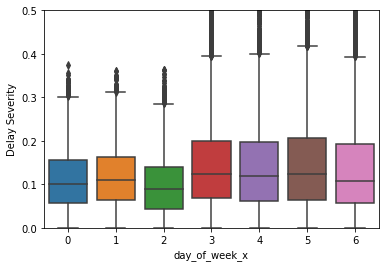

In [53]:
ax = sns.boxplot(x = "day_of_week_x", y = "Delay Severity", data = df_delay) 
ax.set(ylim=(0,0.5))
# this tallies with what we have seen a few codes above, where the "anomalous"(not proven/disproven yet) data 
# will pull up the mean significantly. 

# As usual, day 3,5,6 are higher in terms of average delay as there are the days where people take a break from work
# and hence higher traffic leading to possibly more jams/delays.

In [54]:
# overview of the skewness
df_delay.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


pingtimestamp_x     0.009160
rawlat_x           -1.592450
rawlng_x           -0.042268
speed_x             0.843124
bearing_x           0.016176
accuracy_x         13.804824
day_of_week_x      -0.001547
pingtimestamp_y     0.010599
rawlat_y           -1.587313
rawlng_y           -0.043613
speed_y             0.814421
bearing_y           0.002540
accuracy_y          9.704357
day_of_week_y      -0.001547
Required Time       3.450142
Time Used           5.290251
Delay Severity      9.767585
dtype: float64

In [55]:
# overview of unique rides that have a significant amount of delay/narrow our route id of interest
df_severe = df_delay[df_delay['Delay Severity'] > 1]
df_severe

,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,Required Time,Time Used,Delay Severity
40583,8662,car,android,1555570541,-6.262483,107.062073,12.570000,286,3.900,06:55:41,3,car,android,1555574966,-6.248111,106.995262,14.610000,300,3.900,08:09:26,3,0.167114,1.229167,1.062053
40839,19748,car,ios,1555572989,-6.166327,106.793602,3.560000,97,5.000,07:36:29,3,car,ios,1555584042,-6.166323,106.794548,7.460000,62,10.000,10:40:42,3,0.008170,3.070278,3.062108
41000,50492,motorcycle,android,1555574330,-6.092360,106.698830,5.710000,14,7.000,07:58:50,3,motorcycle,android,1555585837,-6.197351,106.935745,5.240000,88,4.000,11:10:37,3,1.395129,3.196389,1.801260
41121,5278,motorcycle,android,1555575356,-6.170331,106.942932,12.510000,171,3.900,08:15:56,3,motorcycle,android,1555581109,-6.251167,106.962021,4.330000,225,3.216,09:51:49,3,0.203962,1.598056,1.394093
41330,42573,car,ios,1555577257,-6.238797,106.899582,5.470000,113,5.000,08:47:37,3,car,ios,1555591697,-6.152712,106.866859,4.640000,66,10.000,12:48:17,3,0.517241,4.011111,3.493870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54789,3703,car,android,1555844725,-6.311733,106.862633,8.470000,181,3.900,11:05:25,6,car,android,1555853774,-6.569499,106.810791,9.980000,281,9.648,13:36:14,6,0.953596,2.513611,1.560015
55216,20796,car,android,1555851208,-6.234617,106.561554,9.589006,331,8.000,12:53:28,6,car,android,1555858860,-6.224320,106.508553,13.276700,86,12.000,15:01:00,6,0.173086,2.125556,1.952470
55260,9872,car,android,1555851968,-6.262616,106.843575,5.920000,269,4.551,13:06:08,6,car,android,1555855943,-6.258811,106.843521,8.080000,157,4.551,14:12:23,6,0.019744,1.104167,1.084422
55266,47383,car,android,1555852061,-6.238317,106.646225,9.518758,338,3.900,13:07:41,6,car,android,1555857590,-6.343928,106.749794,9.109039,180,4.100,14:39:50,6,0.477505,1.535833,1.058328


In [79]:
df_severe.describe()

,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,day_of_week_x,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,day_of_week_y,Required Time,Time Used,Delay Severity
count,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.555710e+09,-6.261732,106.823227,8.893739,172.580247,5.985949,4.555556,1.555718e+09,-6.296252,106.879578,4.973420,146.481481,6.085727,4.555556,0.537862,2.120466,1.582605
std,8.159444e+04,0.118255,0.137736,4.033787,98.224216,3.939288,0.935414,8.104134e+04,0.133434,0.161090,4.310352,102.689351,5.128937,0.935414,0.541006,1.110971,0.967738
min,1.555571e+09,-6.630229,106.415314,2.888157,7.000000,3.216000,3.000000,1.555575e+09,-6.781345,106.446472,0.000000,0.000000,3.000000,3.000000,0.000270,1.104167,1.002992
25%,1.555648e+09,-6.315795,106.734947,5.920000,95.000000,3.900000,4.000000,1.555655e+09,-6.343928,106.794548,1.760000,62.000000,3.900000,4.000000,0.184582,1.397500,1.065975
50%,1.555731e+09,-6.238447,106.830025,8.130000,173.000000,4.000000,5.000000,1.555739e+09,-6.262956,106.884537,4.730000,165.000000,4.100000,5.000000,0.370517,1.766111,1.227276
75%,1.555756e+09,-6.172871,106.909645,10.967186,260.000000,6.432000,5.000000,1.555765e+09,-6.220975,106.967751,7.460000,225.000000,6.858000,5.000000,0.757474,2.338611,1.582164
max,1.555857e+09,-6.075687,107.284836,23.119999,355.000000,30.016001,6.000000,1.555863e+09,-6.074520,107.368652,19.440001,356.000000,34.235001,6.000000,3.462766,7.595556,7.528370


In [56]:
df_severe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 40583 to 55501
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   trj_id           81 non-null     category
 1   driving_mode_x   81 non-null     category
 2   osname_x         81 non-null     category
 3   pingtimestamp_x  81 non-null     int32   
 4   rawlat_x         81 non-null     float32 
 5   rawlng_x         81 non-null     float32 
 6   speed_x          81 non-null     float32 
 7   bearing_x        81 non-null     int32   
 8   accuracy_x       81 non-null     float32 
 9   time_x           81 non-null     object  
 10  day_of_week_x    81 non-null     int64   
 11  driving_mode_y   81 non-null     category
 12  osname_y         81 non-null     category
 13  pingtimestamp_y  81 non-null     int32   
 14  rawlat_y         81 non-null     float32 
 15  rawlng_y         81 non-null     float32 
 16  speed_y          81 non-null     float3

In [59]:
# try to analyse between cars and motorcycles - main difference between Jakarta and SG
df_severe['driving_mode_x'].value_counts()

car           50
motorcycle    31
Name: driving_mode_x, dtype: int64

In [60]:
# narrow our delay severity of interest
df_severe_2 = df_delay[df_delay['Delay Severity'] > 0.25]
df_severe_2

,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,Required Time,Time Used,Delay Severity
58,17744,car,android,1554683216,-6.144849,106.941048,12.480000,182,10.720,00:26:56,0,car,android,1554684697,-6.134648,106.892952,5.010000,186,10.720,00:51:37,0,0.121120,0.411389,0.290268
68,82954,car,android,1554683305,-6.175396,106.804474,2.866488,61,3.442,00:28:25,0,car,android,1554684590,-6.176682,106.805977,4.842507,143,3.900,00:49:50,0,0.021202,0.356944,0.335743
93,10162,car,ios,1554683587,-6.322038,106.836258,10.270000,217,5.000,00:33:07,0,car,ios,1554684822,-6.302602,106.854202,12.330000,119,5.000,00:53:42,0,0.079143,0.343056,0.263913
164,25117,car,android,1554684600,-6.169922,106.787796,8.839839,349,3.900,00:50:00,0,car,android,1554686019,-6.188573,106.797333,3.726589,167,3.430,01:13:39,0,0.072808,0.394167,0.321359
211,16941,car,ios,1554685100,-6.210763,106.922928,11.470584,173,4.000,00:58:20,0,car,ios,1554686449,-6.225789,106.879112,0.995902,294,4.000,01:20:49,0,0.124131,0.374722,0.250592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55928,62308,car,ios,1555888358,-6.361282,106.816505,10.290000,45,10.000,23:12:38,6,car,ios,1555890347,-6.276112,106.808609,2.310000,181,10.000,23:45:47,6,0.255351,0.552500,0.297149
55936,45137,car,android,1555888460,-6.188851,106.861641,10.340175,259,9.000,23:14:20,6,car,android,1555890623,-6.280887,106.838501,7.940157,197,9.000,23:50:23,6,0.281941,0.600833,0.318892
55944,9330,motorcycle,ios,1555888570,-6.192143,106.943199,9.900000,227,10.000,23:16:10,6,motorcycle,ios,1555890523,-6.195588,106.883408,8.210000,184,5.000,23:48:43,6,0.185980,0.542500,0.356520
55945,19758,motorcycle,android,1555888583,-6.305293,106.887230,8.252027,295,3.900,23:16:23,6,motorcycle,android,1555890437,-6.257876,106.855942,2.004328,259,3.199,23:47:17,6,0.211517,0.515000,0.303483


In [62]:
df_severe_2['driving_mode_x'].value_counts()
# once again, motorcycle has a far lower probability of being in a major traffic delay.

car           2399
motorcycle    1467
Name: driving_mode_x, dtype: int64

**Claim 1**: We believe that motorcycles should have less severe delays since they are able to weave thru heavy traffic as compared to cars, which are relatively bigger in size and harder to maneourve when there is a traffic jam.

**Insight 1**: As expected,Motorcycles have a much lesser tendency/probability(38%) of being in a severe traffic delay(>1 hr) as compared to cars(62%). As a result, Grab department in Jakarta can look towards expanding Grab motorcycle ride services, by advertising on motorcycle rider job vacancies, increasing the benefits/incentives of being a Grab motorcycle.We can also look to expand this motorcycle job to Singaporeans, and this is also good for the Singaporeans in the sense that it creates extra job opportunities for them too,along with the fact of an an increasing ridership/ownership trend in Singapore. Extra data can be collected to suggest that motorcycles are less likely to be stuck in a severe traffic delay/jam.  For the passenger's side, they may be concerned about the overall safety of the ride, as being in a motorcycle is less safe than a car. To explicitly tackle the concern, studies can be done or results can be collected(from accidents data in Jakarta) to show that claims that motorcycle rides are dangerous are not statistically signficiant enough, hence that claim can be rejected. If empirical evidence is enough to not reject the claim, perhaps the speed of the ride can be lowered, while ensuring there is not much delay as compared if riding on a car.

In [68]:
df_2 = pd.read_parquet('city=Jakarta/part-00003-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet', engine = 'pyarrow')
df_2['trj_id'] = df_2['trj_id'].astype('str')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5598078 entries, 0 to 5598077
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trj_id         object 
 1   driving_mode   object 
 2   osname         object 
 3   pingtimestamp  int64  
 4   rawlat         float64
 5   rawlng         float64
 6   speed          float64
 7   bearing        int64  
 8   accuracy       float64
dtypes: float64(4), int64(2), object(3)
memory usage: 384.4+ MB


In [69]:
df_severe['trj_id']

40583     8662
40839    19748
41000    50492
41121     5278
41330    42573
         ...  
54789     3703
55216    20796
55260     9872
55266    47383
55501    48913
Name: trj_id, Length: 81, dtype: category
Categories (55995, object): ['1', '10000', '10002', '10003', ..., '9996', '9997', '9998', '9999']

In [82]:
# get top 5 with longest delay time
df_supersevere = df_severe.sort_values('Delay Severity',ascending = False).head(5)
df_supersevere

,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,Required Time,Time Used,Delay Severity
48665,16791,car,android,1555730687,-6.286867,106.712639,7.072283,104,3.900,03:24:47,5,car,android,1555758031,-6.282017,106.727318,13.3416,281,6.000,11:00:31,5,0.067186,7.595556,7.528370
48679,2265,car,android,1555730956,-6.483775,106.870483,5.800000,159,3.900,03:29:16,5,car,android,1555749428,-6.399971,106.825409,0.0000,0,3.000,08:37:08,5,0.504020,5.131111,4.627091
46719,20667,motorcycle,android,1555671094,-6.399575,106.815193,3.800000,103,3.722,10:51:34,4,motorcycle,android,1555685111,-6.390461,106.825371,0.0000,0,5.529,14:45:11,4,0.110468,3.893611,3.783144
41330,42573,car,ios,1555577257,-6.238797,106.899582,5.470000,113,5.000,08:47:37,3,car,ios,1555591697,-6.152712,106.866859,4.6400,66,10.000,12:48:17,3,0.517241,4.011111,3.493870
47252,34444,motorcycle,ios,1555679233,-6.165064,106.655670,4.370000,295,5.000,13:07:13,4,motorcycle,ios,1555691056,-6.164478,106.629440,0.9500,226,10.000,16:24:16,4,0.184582,3.284167,3.099585


In [83]:
df_supersevere.describe()

,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,day_of_week_x,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,day_of_week_y,Required Time,Time Used,Delay Severity
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,1.555678e+09,-6.314815,106.790726,5.302457,154.800000,4.304400,4.20000,1.555695e+09,-6.277928,106.774879,3.786320,114.600000,6.905800,4.20000,0.276699,4.783111,4.506412
std,6.280626e+04,0.127197,0.103859,1.278159,81.677414,0.639138,0.83666,6.655853e+04,0.118453,0.096148,5.673388,131.079365,3.046288,0.83666,0.217686,1.707701,1.780050
min,1.555577e+09,-6.483775,106.655670,3.800000,103.000000,3.722000,3.00000,1.555592e+09,-6.399971,106.629440,0.000000,0.000000,3.000000,3.00000,0.067186,3.284167,3.099585
25%,1.555671e+09,-6.399575,106.712639,4.370000,104.000000,3.900000,4.00000,1.555685e+09,-6.390461,106.727318,0.000000,0.000000,5.529000,4.00000,0.110468,3.893611,3.493870
50%,1.555679e+09,-6.286867,106.815193,5.470000,113.000000,3.900000,4.00000,1.555691e+09,-6.282017,106.825371,0.950000,66.000000,6.000000,4.00000,0.184582,4.011111,3.783144
75%,1.555731e+09,-6.238797,106.870483,5.800000,159.000000,5.000000,5.00000,1.555749e+09,-6.164478,106.825409,4.640000,226.000000,10.000000,5.00000,0.504020,5.131111,4.627091
max,1.555731e+09,-6.165064,106.899582,7.072283,295.000000,5.000000,5.00000,1.555758e+09,-6.152712,106.866859,13.341600,281.000000,10.000000,5.00000,0.517241,7.595556,7.528370


In [88]:
df_filtered = df_j[(df_j['trj_id'] == '16791')|(df_j['trj_id'] == '2265')|(df_j['trj_id'] == '20667')|(df_j['trj_id'] == '42573')|(df_j['trj_id'] =='34444')]
df_filtered
        

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day_of_week
1443332,42573,car,ios,1555577369,-6.244525,106.903351,8.140000,58,5.0,08:49:29,3
1443334,42573,car,ios,1555584317,-6.592458,106.770027,2.230000,140,10.0,10:45:17,3
1443473,42573,car,ios,1555587688,-6.504722,106.865631,18.959999,339,10.0,11:41:28,3
1443503,42573,car,ios,1555584602,-6.593231,106.776871,6.890000,308,10.0,10:50:02,3
1443638,42573,car,ios,1555586750,-6.599353,106.804863,2.170000,166,10.0,11:25:50,3
...,...,...,...,...,...,...,...,...,...,...,...
3828751,34444,motorcycle,ios,1555679638,-6.152778,106.640320,8.710000,213,5.0,13:13:58,4
3828800,34444,motorcycle,ios,1555681847,-6.150111,106.611710,8.280000,266,5.0,13:50:47,4
3829539,34444,motorcycle,ios,1555681286,-6.160582,106.632591,0.970000,275,10.0,13:41:26,4
3829911,34444,motorcycle,ios,1555679623,-6.153396,106.641273,11.930000,240,5.0,13:13:43,4


In [76]:
df_severe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 40583 to 55501
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   trj_id           81 non-null     category
 1   driving_mode_x   81 non-null     category
 2   osname_x         81 non-null     category
 3   pingtimestamp_x  81 non-null     int32   
 4   rawlat_x         81 non-null     float32 
 5   rawlng_x         81 non-null     float32 
 6   speed_x          81 non-null     float32 
 7   bearing_x        81 non-null     int32   
 8   accuracy_x       81 non-null     float32 
 9   time_x           81 non-null     object  
 10  day_of_week_x    81 non-null     int64   
 11  driving_mode_y   81 non-null     category
 12  osname_y         81 non-null     category
 13  pingtimestamp_y  81 non-null     int32   
 14  rawlat_y         81 non-null     float32 
 15  rawlng_y         81 non-null     float32 
 16  speed_y          81 non-null     float3

In [89]:
def get_route(df, trj_id):
    return df_filtered.query('trj_id == ' + f"'{trj_id}'").sort_values("pingtimestamp")[["rawlat", "rawlng"]]

In [90]:
route_1 = get_route(df_filtered, '16791')
route_2 = get_route(df_filtered, '2265')
route_3 = get_route(df_filtered, '20667')
route_4 = get_route(df_filtered, '42573')
route_5 = get_route(df_filtered, '34444')

In [91]:
# function to get start and ending position of trajectory
def get_start_end_pos(trj):
  return (trj.iloc[0, :], trj.iloc[-1, :])

In [93]:
# create new figure
fig_trj = Figure(height = 550, width = 750)

# add map to figure
m_trj = folium.Map(location = [indo_lat, indo_lng],
                tiles = 'cartodbpositron', zoom_start = 11,
                min_zoom = 11, max_zoom = 16)
fig_trj.add_child(m_trj)

# Creating feature groups
f1 = folium.FeatureGroup("Slowest")
f2 = folium.FeatureGroup("2nd Slowest")
f3 = folium.FeatureGroup("3rd Slowest")

# Adding lines to the different feature groups
line_1 = folium.vector_layers.PolyLine(route_1.values,
                                       popup = '<b>Path of Vehicle_1</b>',
                                       tooltip = 'Slowest',
                                       color = 'blue', weight = 1).add_to(f1)                                  
line_2 = folium.vector_layers.PolyLine(route_2.values,
                                       popup = '<b>Path of Vehicle_2</b>',
                                       tooltip = '2nd Slowest',
                                       color = 'red', weight = 1).add_to(f2)
line_3 = folium.vector_layers.PolyLine(route_3.values,
                                       popup = '<b>Path of Vehicle_3</b>',
                                       tooltip = '3rd Slowest',
                                       color = 'green', weight = 1).add_to(f3)

# add ploylines to map
f1.add_to(m_trj)
f2.add_to(m_trj)
f3.add_to(m_trj)

# get start and end points of each trajectory
route_1_positions = get_start_end_pos(route_1)
route_2_positions = get_start_end_pos(route_2)
route_3_positions = get_start_end_pos(route_3)
route_4_positions = get_start_end_pos(route_4)
route_5_positions = get_start_end_pos(route_5)

# add markers for trj 1
folium.Marker(
    location = [route_1_positions[0][0], route_1_positions[0][1]],
    popup = "start point",
    icon = folium.Icon(color = "green"),
).add_to(f1)

folium.Marker(
    location = [route_1_positions[1][0], route_1_positions[1][1]],
    popup = "end point",
    icon = folium.Icon(color = "red"),
).add_to(f1)

# trj 2
folium.Marker(
    location = [route_2_positions[0][0], route_2_positions[0][1]],
    popup = "start point",
    icon = folium.Icon(color = "green"),
).add_to(f2)

folium.Marker(
    location = [route_2_positions[1][0], route_2_positions[1][1]],
    popup = "end point",
    icon = folium.Icon(color = "red"),
).add_to(f2)

# trj 3
folium.Marker(
    location = [route_3_positions[0][0], route_3_positions[0][1]],
    popup = "start point",
    icon = folium.Icon(color = "green"),
).add_to(f3)

folium.Marker(
    location = [route_3_positions[1][0], route_3_positions[1][1]],
    popup = "end point",
    icon = folium.Icon(color = "red"),
).add_to(f3)

# trj 4
folium.Marker(
    location = [route_4_positions[0][0], route_4_positions[0][1]],
    popup = "start point",
    icon = folium.Icon(color = "green"),
).add_to(f3)

folium.Marker(
    location = [route_4_positions[1][0], route_4_positions[1][1]],
    popup = "end point",
    icon = folium.Icon(color = "red"),
).add_to(f3)

# trj 5
folium.Marker(
    location = [route_5_positions[0][0], route_5_positions[0][1]],
    popup = "start point",
    icon = folium.Icon(color = "green"),
).add_to(f3)

folium.Marker(
    location = [route_5_positions[1][0], route_5_positions[1][1]],
    popup = "end point",
    icon = folium.Icon(color = "red"),
).add_to(f3)

# add layer control to toggle layers
folium.LayerControl().add_to(m_trj)

# add title
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Routes in Jakarta of severe delay in April 2019 for Grab ')

m_trj.get_root().html.add_child(folium.Element(title_html))

m_trj